In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

Описание данных:
https://docs.google.com/document/d/1iks64Nza1vyvI6ji01x3LG8NuKlTjfFT7L6ZnmKhZqk/edit

In [2]:
sample_subm = pd.read_csv('../input/vacancy-salary-prediction/sample_submission.csv')
train = pd.read_csv('../input/vacancy-salary-prediction/train.csv', index_col=0)
test = pd.read_csv('../input/vacancy-salary-prediction/test.csv', index_col=0)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [129]:
train.shape, test.shape

((1050815, 70), (40000, 66))

In [ ]:
# col_name = 'workers_with_disabled_children'
# print(train[col_name].unique()), print(len(train[col_name].unique()))

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050815 entries, 0 to 1050814
Data columns (total 70 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   accommodation_capability                       199381 non-null   float64
 1   accommodation_housing                          65216 non-null    object 
 2   additional_info                                1020870 non-null  object 
 3   base_salary                                    1050815 non-null  object 
 4   base_salary_max                                1050815 non-null  float64
 5   base_salary_min                                1050815 non-null  float64
 6   career_perspective                             3763 non-null     object 
 7   caring_workers                                 1046432 non-null  float64
 8   date_creation                                  1050815 non-null  object 
 9   date_creation_mistake   

In [179]:
pd.to_datetime(train['date_time_posted']).min(), pd.to_datetime(train['date_time_posted']).max()

(Timestamp('2017-03-31 00:00:00'), Timestamp('2021-11-05 22:25:13'))

In [180]:
pd.to_datetime(test['date_time_posted']).min(), pd.to_datetime(test['date_time_posted']).max()

(Timestamp('2017-12-04 00:00:00'), Timestamp('2021-11-05 12:05:12'))

<AxesSubplot:>

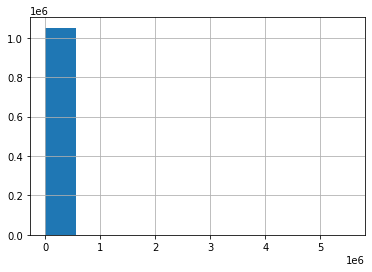

In [185]:
# target distribution
train['mean_salary'].hist(bins=10)

<AxesSubplot:ylabel='Density'>

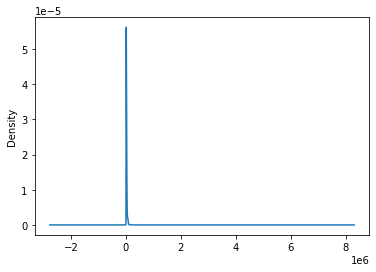

In [186]:
train['mean_salary'].plot(kind='kde')

<AxesSubplot:>

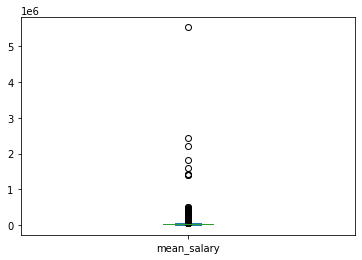

In [187]:
train['mean_salary'].plot(kind='box')

In [190]:
len(train[train['mean_salary'] > 300000]), len(train[train['mean_salary'] > 600000])

(59, 8)

In [192]:
len(train[train['mean_salary'] > 150000])

896

In [194]:
train['job_location_address_codes'] = train['job_location_address'].astype('category').cat.codes

<AxesSubplot:xlabel='job_location_address_codes', ylabel='mean_salary'>

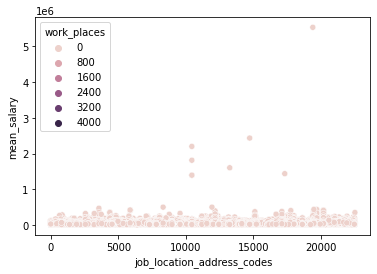

In [195]:
sns.scatterplot(data=train, x="job_location_address_codes", y="mean_salary", hue="work_places")

<AxesSubplot:xlabel='education_requirements_education_type', ylabel='mean_salary'>

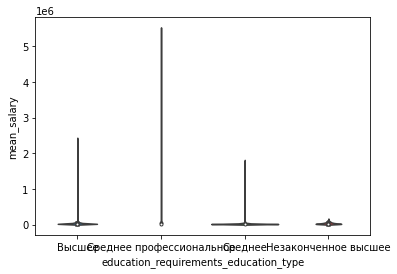

In [204]:
sns.violinplot(x="education_requirements_education_type", y="mean_salary", data=train)

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050815 entries, 0 to 1050814
Data columns (total 71 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   accommodation_capability                       199381 non-null   float64
 1   accommodation_housing                          65216 non-null    object 
 2   additional_info                                1020870 non-null  object 
 3   base_salary                                    1050815 non-null  object 
 4   base_salary_max                                1050815 non-null  float64
 5   base_salary_min                                1050815 non-null  float64
 6   career_perspective                             3763 non-null     object 
 7   caring_workers                                 1046432 non-null  float64
 8   date_creation                                  1050815 non-null  object 
 9   date_creation_mistake   

Quantile filtering

In [5]:
train.shape

(1014292, 70)

In [4]:
train = train.query('(mean_salary < mean_salary.quantile(.99)) & (mean_salary > mean_salary.quantile(.01))')

In [198]:
len(train['job_location_address'].unique())

22517

In [193]:
train.head()

,accommodation_capability,accommodation_housing,additional_info,base_salary,base_salary_max,base_salary_min,career_perspective,caring_workers,date_creation,date_creation_mistake,date_posted,date_posted_mistake,date_time_posted,disabled,dms,drive_licences,driver_licence_a,driver_licence_b,driver_licence_c,driver_licence_d,driver_licence_e,education_academic_degree,education_requirements_education_type,education_requirements_speciality,employment_type,experience_requirements,federal_district,id_hiring_organization,incentive_compensation_transport_compensation,industry,inner_info_contact_source,inner_info_source_type,inner_info_status,is_uzbekistan_recruitment,job_benefits,job_benefits_other_benefits,job_location_additional_address_info,job_location_address,job_location_geo_latitude,job_location_geo_longitude,large_families,metro_station,minor_workers,need_medcard,okso_code,organization,payment_meals,payment_sports_activities,premium_size,premium_type,profession,region,released_persons,requirements_id_priority_category,requirements_qualifications,requirements_required_certificates,responsibilities,retraining_condition,retraining_grant,retraining_grant_value,single_parent,social_protecteds_social_protected,source,time_posted,title,vouchers_health_institutions,work_hours,work_places,workers_with_disabled_children,mean_salary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,Производство строительных металлических констр...,от 50000 до 50000,50000.0,50000.0,NaN,0.0,2019-07-10,NaN,2019-07-05,NaN,2019-07-05 00:00:00,0,0.0,NaN,0,0,0,0,0,NaN,Высшее,Металлообрабатывающие станки и комплексы,Полная занятость,1.0,NaN,1027739386938,NaN,Industry,COMPANY,Вакансия службы занятости,Одобрено,NaN,NaN,Социальный пакет / социальный пакет,"141281, Московская обл, Ивантеевка г, Санаторн...",Московская область,55.986148,37.923422,0,NaN,0.0,NaN,NaN,1027739386938,0,0.0,NaN,NaN,NaN,5000000000000,NaN,NaN,"Должен знать: постановления, распоряжения, при...",NaN,"Разрабатывает эскизные, технические и рабочие ...",NaN,0.0,NaN,0.0,NaN,EMPLOYMENT_SERVICE,00:00:00,Инженер-конструктор,0,Полный рабочий день,1,0.0,50000.0
1,NaN,NaN,Новое рабочее место / ВОДИТЕЛЬ АВТОБУСА. кат.Д...,от 25000 до 25000,25000.0,25000.0,NaN,0.0,2019-12-27,NaN,2019-12-26,NaN,2019-12-26 00:00:00,0,0.0,[D],0,0,0,1,0,NaN,Среднее профессиональное,NaN,Полная занятость,1.0,NaN,1100265000890,NaN,Communal,COMPANY,Вакансия службы занятости,Одобрено,f,NaN,Социальный пакет / кат.Д,"452607, г Октябрьский, ул Кувыкина, д. 3, корп. а",Республика Башкортостан,54.486407,53.483033,0,NaN,0.0,NaN,NaN,1100265000890,0,0.0,NaN,NaN,114428.0,200000000000,NaN,NaN,"Управлять автомобилем, соблюдать правила повед...",NaN,"Профессиональное вождение автомобиля, обеспечи...",NaN,0.0,NaN,0.0,NaN,EMPLOYMENT_SERVICE,00:00:00,Водитель автомобиля,0,Полный рабочий день,1,0.0,25000.0
2,1.0,NaN,Новое рабочее место / Наружные трубопроводы и ...,от 40000 до 40000,40000.0,40000.0,NaN,0.0,2020-08-22,NaN,2020-08-21,NaN,2020-08-21 00:00:00,0,0.0,NaN,0,0,0,0,0,NaN,Среднее профессиональное,NaN,Полная занятость,1.0,4.0,1180280071058,NaN,Industry,COMPANY,Служба занятости,Одобрено,f,NaN,Предоставление жилья / Социальный пакет,"450076, г Уфа, ул Пушкина, д. 35, офис 2",Республика Башкортостан,54.725753,55.925139,0,NaN,0.0,NaN,NaN,1180280071058,0,0.0,NaN,NaN,145445.0,200000000000,0.0,NaN,"Укладка трубопроводов НВК Ду57-1020 мм, монтаж...",NaN,"Укладка трубопроводов НВК Ду57-1020 мм, монтаж...",NaN,0.0,NaN,0.0,NaN,EMPLOYMENT_SERVICE,00:00:00,Монтажник,0,Полный рабочий день,5,0.0,40000.0
3,NaN,NaN,Сохраненное рабочее место / Дисциплинированнос...,от 16250 до 16250,16250.0,16250.0,NaN,0.0,2020-04-15,NaN,2020-04-14,NaN,2020-04-14 00:00:00,0,0.0,"[B, C]",0,1,1,0,0,NaN,Среднее,NaN,Полная занятость,0.0,NaN,1192225018523,NaN,Transport,COMPANY,Вакансия службы занятости,Одобрено,f,NaN,Социальный пакет,"658391, с Шипуново, р-н Шипуновский, ул Вокзал...",Алтайский край,52.220048,82.281251,0,NaN,0.0,NaN,NaN,1192225018523

In [ ]:
# convert date

train['date_time_posted'] = pd.to_datetime(train['date_time_posted'])
test['date_time_posted'] = pd.to_datetime(test['date_time_posted'])

train['date_creation'] = pd.to_datetime(train['date_creation'])
test['date_creation'] = pd.to_datetime(test['date_creation'])


train['date_creation_year'] = train['date_creation'].dt.year
test['date_creation_year'] = test['date_creation'].dt.year

train['date_time_posted_month'] = train['date_time_posted'].dt.month
test['date_time_posted_month'] = test['date_time_posted'].dt.month

train = train.drop(columns=['date_time_posted', 'date_posted', 'date_creation', 'time_posted'])
test = test.drop(columns=['date_time_posted', 'date_posted', 'date_creation', 'time_posted'])

In [162]:
train[~train['organization'].str.isnumeric()]['organization']

id
12         bdb60c00-e8b1-11e8-9bab-e37b4be0b9ed
18         f38170c0-6b7d-11e7-bb9b-4376a32b3f45
27         41cffb30-08ba-11ea-9a2c-ef76bd2a03c1
42         01b805f0-0145-11ea-ab1d-ef76bd2a03c1
54         55ae59b0-ff7b-11e8-8b27-ef76bd2a03c1
                           ...                 
1050773    820e40b0-7496-11ea-b37e-037acc02728d
1050778    ff559240-78a0-11ea-8c98-736ab11edb0c
1050783    06465d50-9e5d-11e5-937c-239645b044d5
1050801    41cffb30-08ba-11ea-9a2c-ef76bd2a03c1
1050804    eba16990-799a-11ea-8463-ef76bd2a03c1
Name: organization, Length: 106775, dtype: object

In [142]:
# replace type
# train['id_hiring_organization'] = train['id_hiring_organization'].fillna('')
# test['id_hiring_organization'] = test['id_hiring_organization'].fillna('')

# train['organization'] = train['organization'].fillna('')
# test['organization'] = test['organization'].fillna('')

# train['id_hiring_organization'] = train['id_hiring_organization'].apply(lambda x: np.where(x.isdigit(),x,'0'))
# test['id_hiring_organization'] = test['id_hiring_organization'].apply(lambda x: np.where(x.isdigit(),x,'0'))

# train['id_hiring_organization'] = train['id_hiring_organization'].astype(int)
# test['id_hiring_organization'] = test['id_hiring_organization'].astype(int)

# train['organization'] = train['organization'].apply(lambda x: np.where(x.isdigit(),x,'0'))
# test['organization'] = test['organization'].apply(lambda x: np.where(x.isdigit(),x,'0'))

# train['organization'] = train['organization'].astype(int)
# test['organization'] = test['organization'].astype(int)

In [ ]:
only_train_cols = ['base_salary_max', 'base_salary_min', 'base_salary'] # + mean_salary

In [ ]:
target_col = ['mean_salary']

In [11]:
train.head()

,id,accommodation_capability,accommodation_housing,additional_info,base_salary,base_salary_max,base_salary_min,career_perspective,caring_workers,date_creation,date_creation_mistake,date_posted,date_posted_mistake,date_time_posted,disabled,dms,drive_licences,driver_licence_a,driver_licence_b,driver_licence_c,driver_licence_d,driver_licence_e,education_academic_degree,education_requirements_education_type,education_requirements_speciality,employment_type,experience_requirements,federal_district,id_hiring_organization,incentive_compensation_transport_compensation,industry,inner_info_contact_source,inner_info_source_type,inner_info_status,is_uzbekistan_recruitment,job_benefits,job_benefits_other_benefits,job_location_additional_address_info,job_location_address,job_location_geo_latitude,job_location_geo_longitude,large_families,metro_station,minor_workers,need_medcard,okso_code,organization,payment_meals,payment_sports_activities,premium_size,premium_type,profession,region,released_persons,requirements_id_priority_category,requirements_qualifications,requirements_required_certificates,responsibilities,retraining_condition,retraining_grant,retraining_grant_value,single_parent,social_protecteds_social_protected,source,time_posted,title,vouchers_health_institutions,work_hours,work_places,workers_with_disabled_children,mean_salary
0,0,NaN,NaN,Производство строительных металлических констр...,от 50000 до 50000,50000.0,50000.0,NaN,0.0,2019-07-10,NaN,2019-07-05,NaN,2019-07-05 00:00:00,0,0.0,NaN,0,0,0,0,0,NaN,Высшее,Металлообрабатывающие станки и комплексы,Полная занятость,1.0,NaN,1027739386938,NaN,Industry,COMPANY,Вакансия службы занятости,Одобрено,NaN,NaN,Социальный пакет / социальный пакет,"141281, Московская обл, Ивантеевка г, Санаторн...",Московская область,55.986148,37.923422,0,NaN,0.0,NaN,NaN,1027739386938,0,0.0,NaN,NaN,NaN,5000000000000,NaN,NaN,"Должен знать: постановления, распоряжения, при...",NaN,"Разрабатывает эскизные, технические и рабочие ...",NaN,0.0,NaN,0.0,NaN,EMPLOYMENT_SERVICE,00:00:00,Инженер-конструктор,0,Полный рабочий день,1,0.0,50000.0
1,1,NaN,NaN,Новое рабочее место / ВОДИТЕЛЬ АВТОБУСА. кат.Д...,от 25000 до 25000,25000.0,25000.0,NaN,0.0,2019-12-27,NaN,2019-12-26,NaN,2019-12-26 00:00:00,0,0.0,[D],0,0,0,1,0,NaN,Среднее профессиональное,NaN,Полная занятость,1.0,NaN,1100265000890,NaN,Communal,COMPANY,Вакансия службы занятости,Одобрено,f,NaN,Социальный пакет / кат.Д,"452607, г Октябрьский, ул Кувыкина, д. 3, корп. а",Республика Башкортостан,54.486407,53.483033,0,NaN,0.0,NaN,NaN,1100265000890,0,0.0,NaN,NaN,114428.0,200000000000,NaN,NaN,"Управлять автомобилем, соблюдать правила повед...",NaN,"Профессиональное вождение автомобиля, обеспечи...",NaN,0.0,NaN,0.0,NaN,EMPLOYMENT_SERVICE,00:00:00,Водитель автомобиля,0,Полный рабочий день,1,0.0,25000.0
2,2,1.0,NaN,Новое рабочее место / Наружные трубопроводы и ...,от 40000 до 40000,40000.0,40000.0,NaN,0.0,2020-08-22,NaN,2020-08-21,NaN,2020-08-21 00:00:00,0,0.0,NaN,0,0,0,0,0,NaN,Среднее профессиональное,NaN,Полная занятость,1.0,4.0,1180280071058,NaN,Industry,COMPANY,Служба занятости,Одобрено,f,NaN,Предоставление жилья / Социальный пакет,"450076, г Уфа, ул Пушкина, д. 35, офис 2",Республика Башкортостан,54.725753,55.925139,0,NaN,0.0,NaN,NaN,1180280071058,0,0.0,NaN,NaN,145445.0,200000000000,0.0,NaN,"Укладка трубопроводов НВК Ду57-1020 мм, монтаж...",NaN,"Укладка трубопроводов НВК Ду57-1020 мм, монтаж...",NaN,0.0,NaN,0.0,NaN,EMPLOYMENT_SERVICE,00:00:00,Монтажник,0,Полный рабочий день,5,0.0,40000.0
3,3,NaN,NaN,Сохраненное рабочее место / Дисциплинированнос...,от 16250 до 16250,16250.0,16250.0,NaN,0.0,2020-04-15,NaN,2020-04-14,NaN,2020-04-14 00:00:00,0,0.0,"[B, C]",0,1,1,0,0,NaN,Среднее,NaN,Полная занятость,0.0,NaN,1192225018523,NaN,Transport,COMPANY,Вакансия службы занятости,Одобрено,f,NaN,Социальный пакет,"658391, с Шипуново, р-н Шипуновский, ул Вокзал...",Алтайский край,52.220048,82.281251,0,NaN,0.0,NaN,NaN,1192225018523,0,0.0,NaN,NaN,114428.0,2200000000000,NaN,NaN,Требования к обр

In [19]:
large_nulls_col = ['career_perspective', 'retraining_grant_value', 'education_academic_degree', 'date_posted_mistake', 'date_creation_mistake']

In [164]:
text_cols = ['additional_info', 'job_location_additional_address_info', 'requirements_qualifications', 'responsibilities', 'career_perspective', 'education_requirements_speciality', \
'job_benefits', 'job_benefits_other_benefits', 'requirements_qualifications', 'social_protecteds_social_protected', 'title']
cat_cols = ['accommodation_housing', 'career_perspective', 'drive_licences', 'employment_type', 'incentive_compensation_transport_compensation',
 'industry', 'inner_info_contact_source', 'inner_info_source_type', 'inner_info_status',
  'job_location_address', 'metro_station', 'requirements_id_priority_category', 'requirements_required_certificates', 'source', 'work_hours', 'organization', 'id_hiring_organization']

In [ ]:
#replace nan's for cats
for column in cat_cols:
    train[column] = train[column].fillna('')

In [12]:
for column in train.columns:
    print(column, ': uniq: ', len(train[column].unique()))

id : uniq:  1050815
accommodation_capability : uniq:  3
accommodation_housing : uniq:  5
additional_info : uniq:  451419
base_salary : uniq:  63362
base_salary_max : uniq:  27259
base_salary_min : uniq:  25250
career_perspective : uniq:  1645
caring_workers : uniq:  3
date_creation : uniq:  2071
date_creation_mistake : uniq:  1
date_posted : uniq:  1340
date_posted_mistake : uniq:  1
date_time_posted : uniq:  57229
disabled : uniq:  2
dms : uniq:  3
drive_licences : uniq:  28
driver_licence_a : uniq:  2
driver_licence_b : uniq:  2
driver_licence_c : uniq:  2
driver_licence_d : uniq:  2
driver_licence_e : uniq:  2
education_academic_degree : uniq:  3
education_requirements_education_type : uniq:  5
education_requirements_speciality : uniq:  2375
employment_type : uniq:  7
experience_requirements : uniq:  36
federal_district : uniq:  11
id_hiring_organization : uniq:  172858
incentive_compensation_transport_compensation : uniq:  4
industry : uniq:  38
inner_info_contact_source : uniq:  3

In [126]:
for col in train.columns:
    uniq_len = len(train[col].unique())
    nan_perc = sum(train[col].isna()) /train.shape[0]
    non_nan_count = sum(~train[col].isna())
    if uniq_len <= 10:
        print(f'nans: {round(nan_perc, 2)}')
        vc = train[col].value_counts()
        for idx, row in zip(vc.index, vc):
            print(idx, row, f'perc: {round(row/non_nan_count, 2)}')

nans: 0.0
-1.0 851434 perc: 0.81
1.0 188634 perc: 0.18
0.0 10747 perc: 0.01
nans: 0.94
DORMITORY 59891 perc: 0.92
FLAT 3795 perc: 0.06
ROOM 1145 perc: 0.02
HOUSE 385 perc: 0.01
nans: 0.0
0.0 1046117 perc: 1.0
-1.0 4383 perc: 0.0
1.0 315 perc: 0.0
nans: 0.0
-1.0 1050815 perc: 1.0
nans: 0.0
-1.0 1050815 perc: 1.0
nans: 0.0
0 980088 perc: 0.93
1 70727 perc: 0.07
nans: 0.0
0.0 1045745 perc: 1.0
-1.0 4153 perc: 0.0
1.0 917 perc: 0.0
nans: 0.0
0 1049943 perc: 1.0
1 872 perc: 0.0
nans: 0.0
0 1021096 perc: 0.97
1 29719 perc: 0.03
nans: 0.0
0 1025019 perc: 0.98
1 25796 perc: 0.02
nans: 0.0
0 1039469 perc: 0.99
1 11346 perc: 0.01
nans: 0.0
0 1040397 perc: 0.99
1 10418 perc: 0.01
nans: 1.0
Кандидат наук 27 perc: 0.9
Доктор наук 3 perc: 0.1
nans: 0.05
Среднее профессиональное 417545 perc: 0.42
Высшее 294546 perc: 0.29
Среднее 289232 perc: 0.29
Незаконченное высшее 200 perc: 0.0
nans: 0.0
Полная занятость 917226 perc: 0.87
Временная 85146 perc: 0.08
Стажировка 22894 perc: 0.02
Сезонная 19016 perc: 

In [ ]:
feat_research = pd.DataFrame(train.isna().sum() / train.shape[0], columns=['train_null_share'])
# feat_research['test_null_share'] = test.isna().sum() / test.shape[0]
feat_research['train_dtypes'] = train.dtypes
feat_research['train_mean'] = train.mean()
feat_research['test_mean'] = test.mean()

feat_research

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


In [59]:
numeric_cols = []
for col in train.columns:
    if not np.isin(train[col].dtypes, 'object'):
        numeric_cols.append(col)
numeric_cols.remove('base_salary_min')
numeric_cols.remove('base_salary_max')
numeric_cols.remove('mean_salary')

# train[numeric_cols] = train[numeric_cols].dropna()
# test[numeric_cols] = test[numeric_cols].dropna()
train[numeric_cols] = train[numeric_cols].fillna(-1)
test[numeric_cols] = test[numeric_cols].fillna(-1)

In [ ]:
for col in numeric_cols:
    train[col].isna()

In [ ]:
# data distribution 

# fig, ax = plt.subplots(len(numeric_cols)-1, 1)
# fig.set_figheight(25)
# fig.set_figwidth(15)


# for i in range(1, len(test.columns)):
#     feat = numeric_cols[i]
#     ax[i-1].hist(train[feat], label=feat+'_train', alpha=0.5, color='blue')
#     ax[i-1].hist(test[feat], label=feat+'_test', alpha=0.5, color='red')
#     ax[i-1].legend()

# plt.show()

accommodation_capability


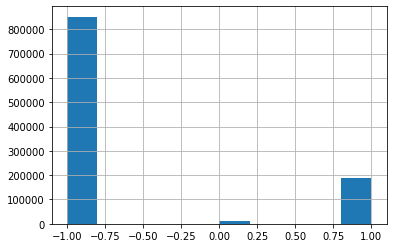

caring_workers


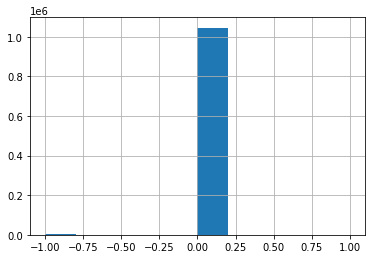

date_creation_mistake


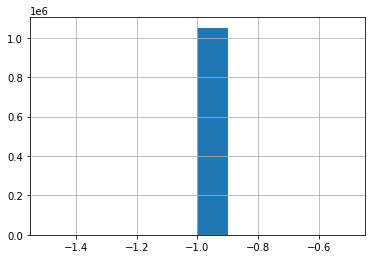

date_posted_mistake


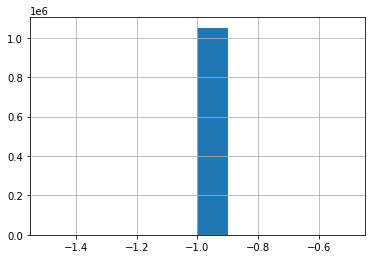

disabled


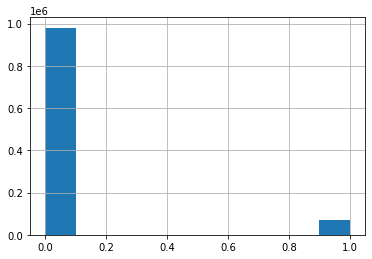

dms


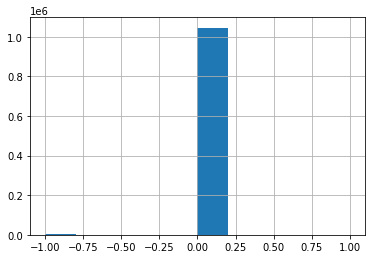

driver_licence_a


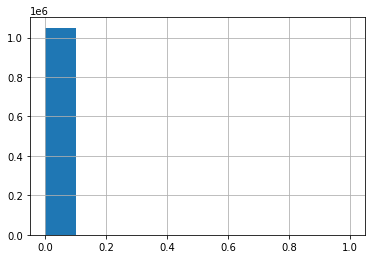

driver_licence_b


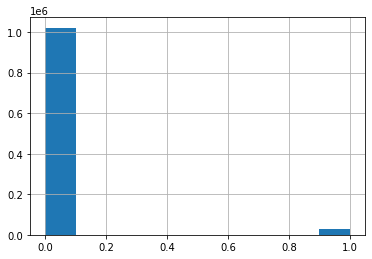

driver_licence_c


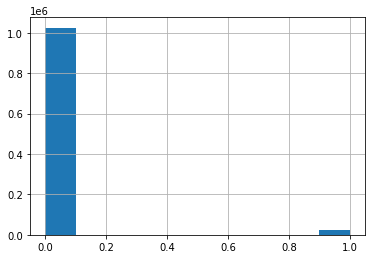

driver_licence_d


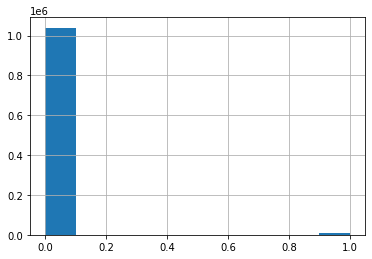

driver_licence_e


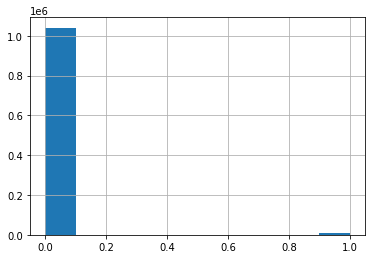

experience_requirements


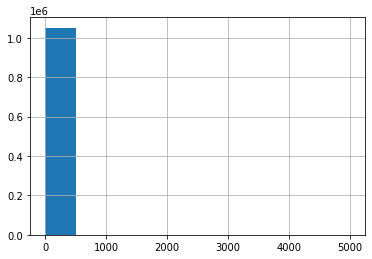

federal_district


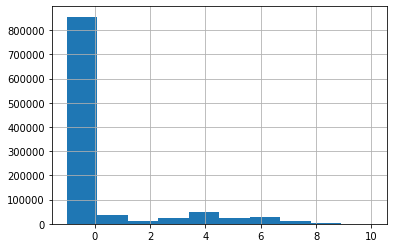

job_location_geo_latitude


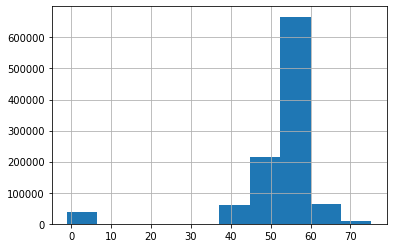

job_location_geo_longitude


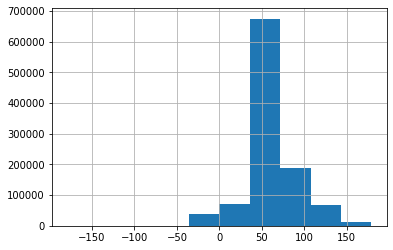

large_families


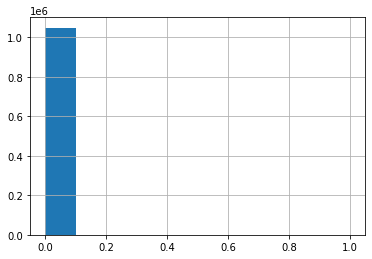

minor_workers


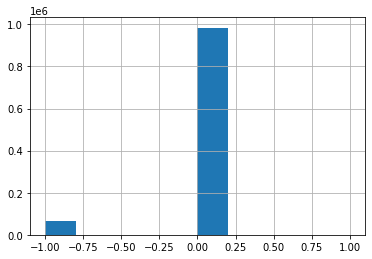

need_medcard


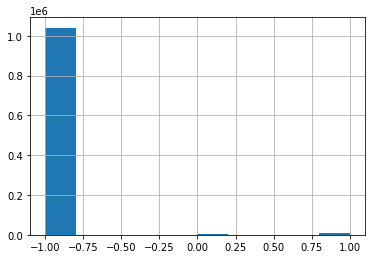

okso_code


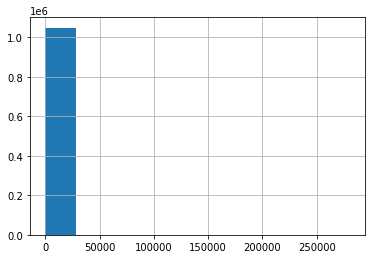

payment_meals


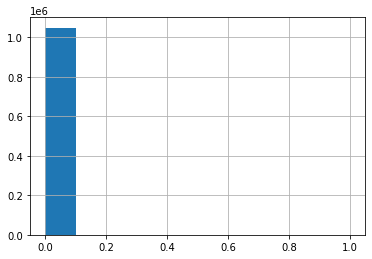

payment_sports_activities


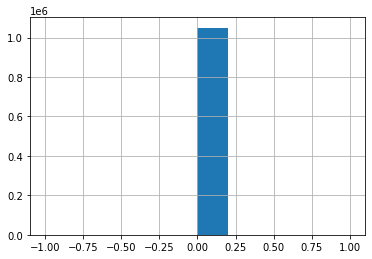

premium_size


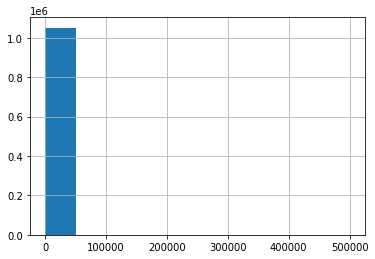

profession


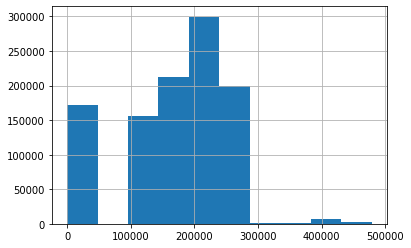

region


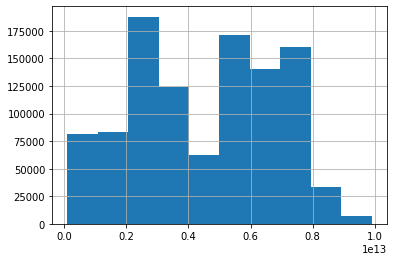

released_persons


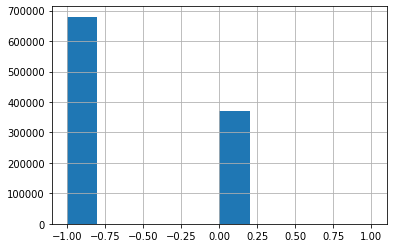

retraining_grant


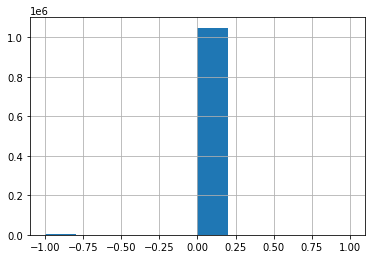

retraining_grant_value


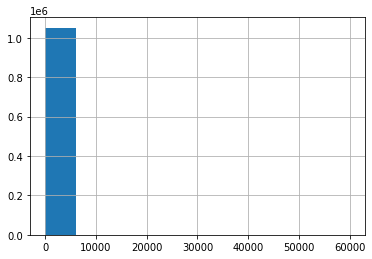

single_parent


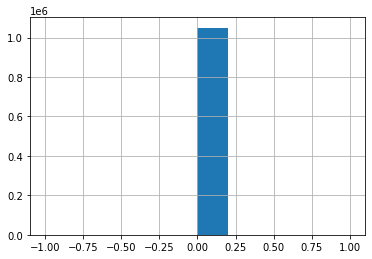

vouchers_health_institutions


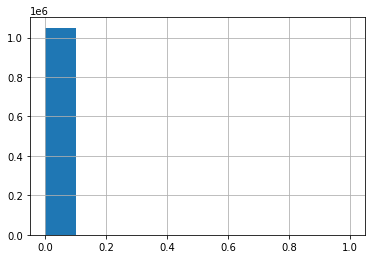

work_places


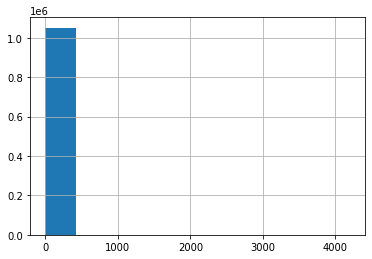

workers_with_disabled_children


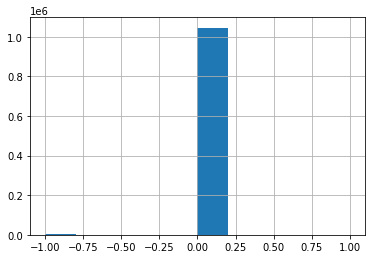

In [66]:
for col in numeric_cols:
    train[col].hist()
    print(col)
    plt.show()

In [78]:
# corr_mat = train.corr().unstack().sort_values().drop_duplicates()

In [163]:
train_corr_mat.sort_values(by='mean_salary', ascending=False)['mean_salary']

mean_salary                       1.000000
base_salary_max                   0.980834
base_salary_min                   0.971940
accommodation_capability          0.278158
job_location_geo_longitude        0.153741
region                            0.109817
federal_district                  0.100388
work_places                       0.071354
driver_licence_e                  0.062073
released_persons                  0.059670
experience_requirements           0.059133
job_location_geo_latitude         0.059120
need_medcard                      0.056639
payment_meals                     0.050209
driver_licence_c                  0.048164
premium_size                      0.030809
dms                               0.021577
driver_licence_b                  0.020663
vouchers_health_institutions      0.020388
payment_sports_activities         0.019178
driver_licence_d                  0.016418
workers_with_disabled_children    0.013551
caring_workers                    0.013298
single_pare

In [168]:
train_for_corr = train.copy()
train_for_corr[cat_cols] = train_for_corr[cat_cols].astype('category')
train_for_corr[cat_cols] = train_for_corr[cat_cols].apply(lambda x: x.cat.codes)

In [170]:
train_corr_mat = train_for_corr.corr()
train_corr_mat.sort_values(by='mean_salary', ascending=False)['mean_salary']

mean_salary                                      1.000000
base_salary_max                                  0.980834
base_salary_min                                  0.971940
retraining_grant_value                           0.388944
incentive_compensation_transport_compensation    0.245559
premium_size                                     0.190544
job_location_geo_latitude                        0.187808
accommodation_housing                            0.179682
job_location_geo_longitude                       0.178713
job_location_address                             0.123058
okso_code                                        0.115580
region                                           0.109817
id_hiring_organization                           0.090905
organization                                     0.090905
requirements_id_priority_category                0.085939
federal_district                                 0.073551
work_places                                      0.071354
experience_req

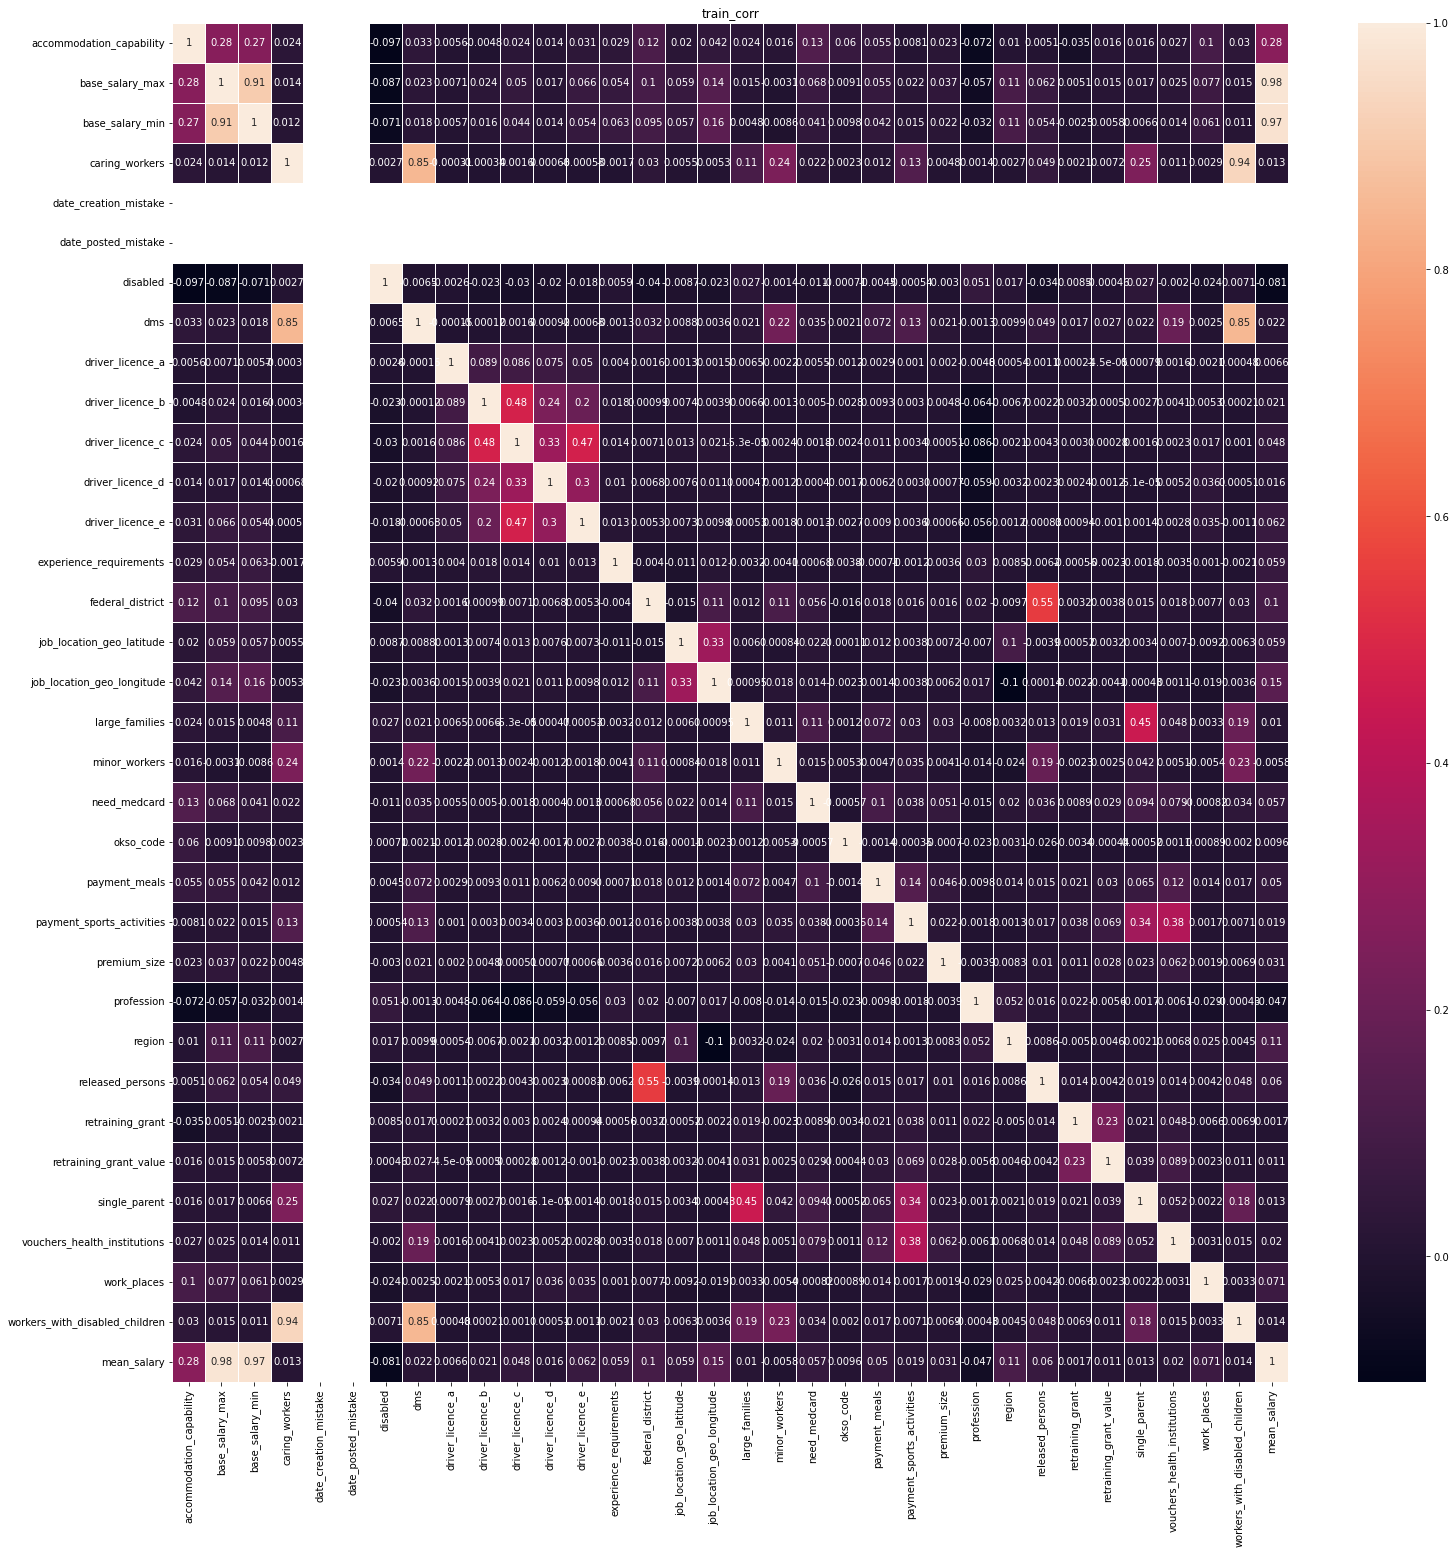

In [82]:
# train correlation matrix
ax=plt.figure(figsize=(25,25))
sns.heatmap(train.corr(),linewidths=1,linecolor='white',annot=True)
plt.title('train_corr')
plt.show()

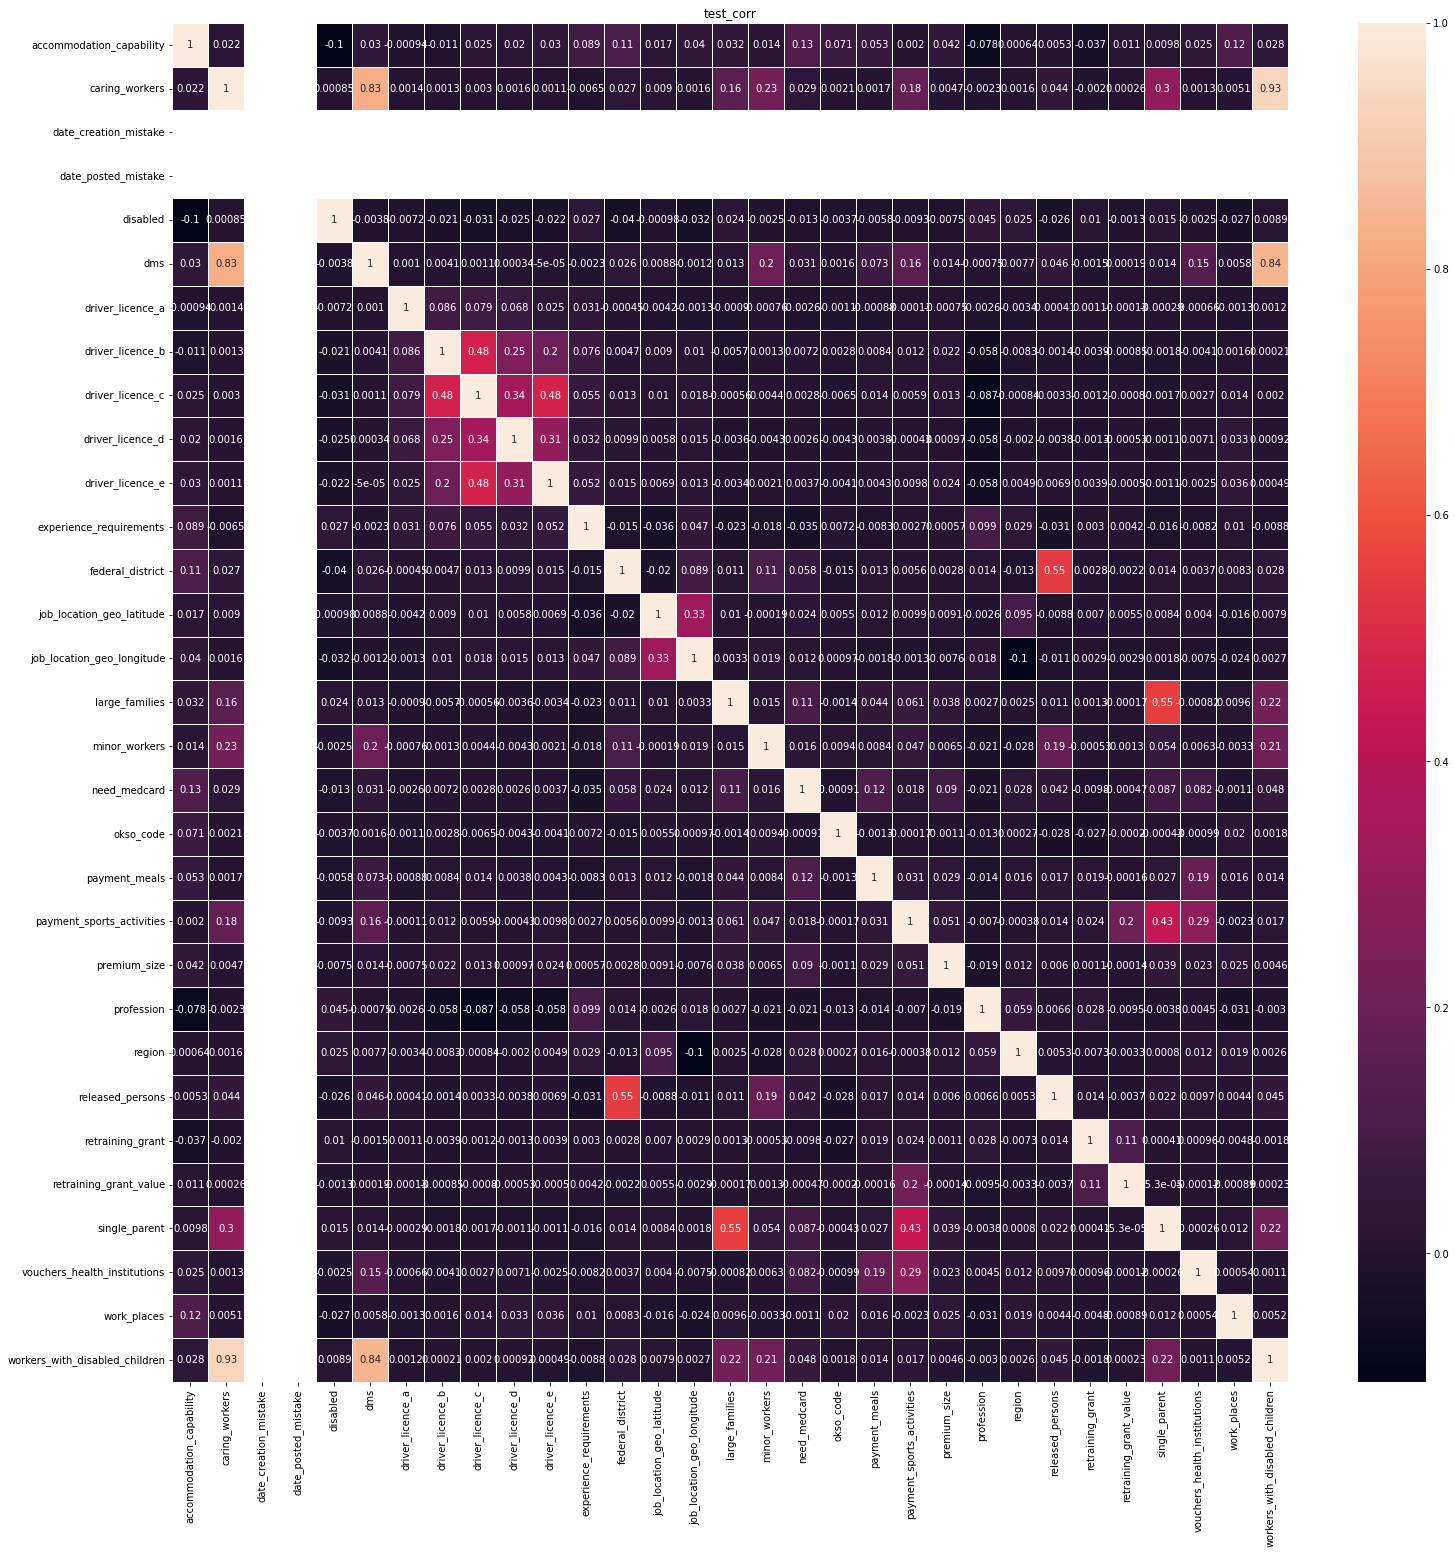

In [83]:
# test correlation matrix 
ax=plt.figure(figsize=(25,25))
sns.heatmap(test.corr(),linewidths=1,linecolor='white',annot=True)
plt.title('test_corr')
plt.show()

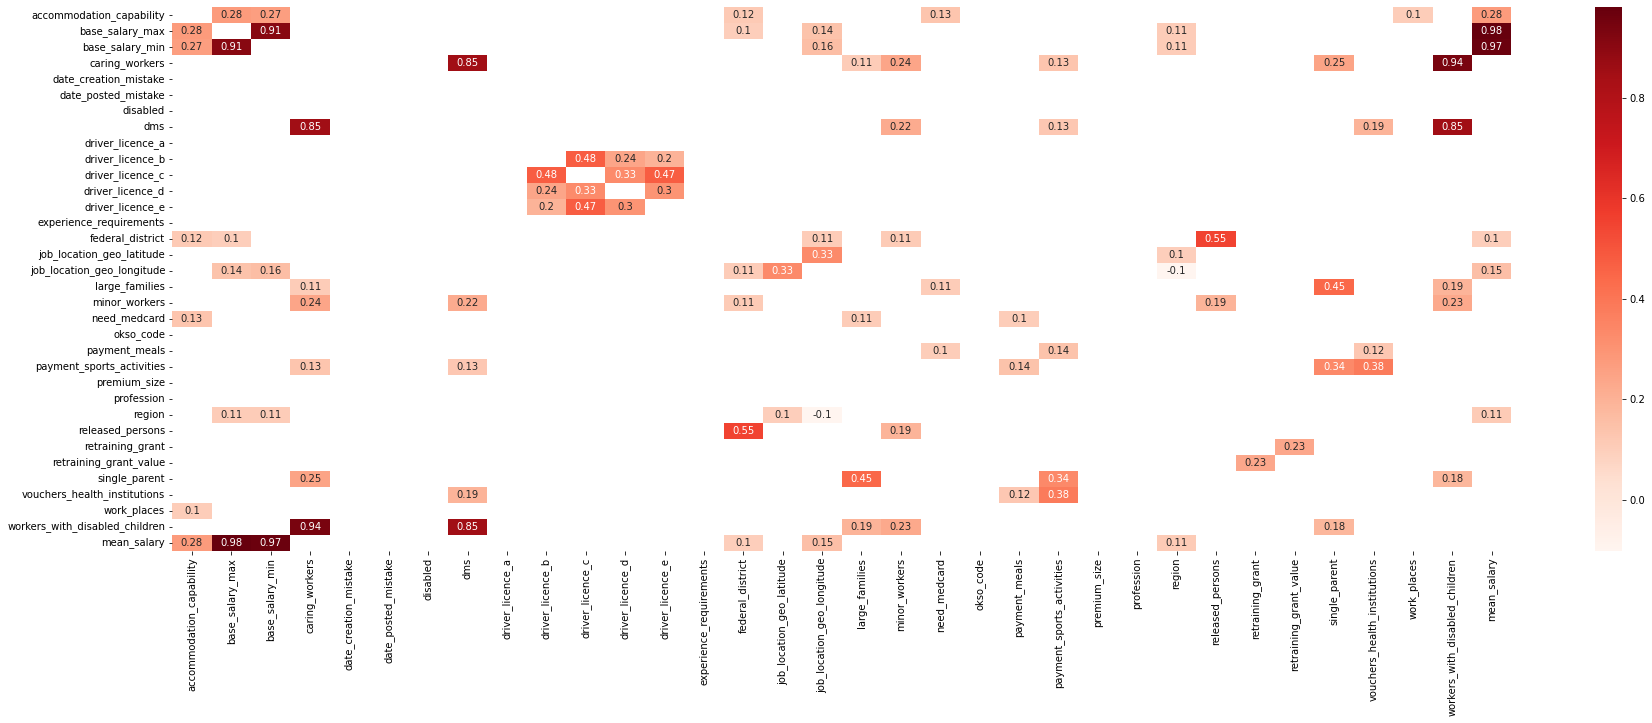

In [92]:
dfCorr = train.corr() # https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
filteredDf = dfCorr[((dfCorr >= .1) | (dfCorr <= -.1)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

## To do:
* Выделить регион (по координатам или по названию или) geo api? https://pypi.org/project/geopy/
* лематизация / токенизация
* эмбеддинги
* NER (for hightlight title / location) 
* groupby features based on company / location / jobe role - mean salary
* clusterize coordinates
* clusterized numbers features with high